# Implementing a neural network in Python

---

## Programming Environment

1

```bash
conda create -n tf -v -y \
-c conda-forge --strict-channel-priority \
'imbalanced-learn=0.11' \
'matplotlib      =3.07' \
'numpy           =1.25' \
'pandas          =2.01' \
'plotly          =5.16' \
'python          =3.11' \
'scikit-learn    =1.03'
```

2

```bash
conda activate tf
```

3

TensorFlow latest

```bash
python -m pip install tensorflow
```

TensorFlow 2.12

```bash
python -m pip install tensorflow-macos==2.12
```

4

[ [d](https://developer.apple.com/metal/tensorflow-plugin/) ][ [p](https://pypi.org/project/tensorflow-metal/) ][ [f](https://developer.apple.com/forums/tags/tensorflow-metal/) ] tensorflow-metal latest

```bash
python -m pip install tensorflow-metal
```

tensorflow-metal 0.8

```bash
python -m pip install tensorflow-metal==0.8
```

In [1]:
import numpy                      as np
np.set_printoptions(suppress=True) # suppress scientific notation
import numpy.random               as npr
import pandas                     as pd

import matplotlib                 as mpl
import matplotlib.pyplot          as plt

import sklearn                    as skl
from   sklearn.datasets           import make_blobs, make_moons
from   sklearn.ensemble           import RandomForestClassifier
from   sklearn.linear_model       import LogisticRegression
from   sklearn.metrics            import accuracy_score
from   sklearn.model_selection    import train_test_split
from   sklearn.preprocessing      import OneHotEncoder, StandardScaler
from   sklearn.svm                import SVC

import tensorflow                 as tf
from   tensorflow.keras.callbacks import ModelCheckpoint

import datetime
from   importlib.metadata import version
import os
import platform as p
import sys

pad = 20
print(  f"\n{'Executed' : <{pad}} : {datetime.datetime.now().astimezone().strftime('%Y-%m-%d %H:%M:%S %z %Z')}"
        f"\n{'Platform' : <{pad}} : {p.platform(aliased = False, terse = False)}"
        f"\n{'Conda'    : <{pad}} : {os.environ['CONDA_DEFAULT_ENV'] or sys.executable.split('/')[-3]}"
        f"\n{'Python'   : <{pad}} : {p.python_implementation()} {p.python_version()} {sys.executable}")
print(*[f'{name : <{pad}} : {version(name)}'
        for name in ['Matplotlib', 'NumPy', 'Pandas', 'Scikit-Learn', 'TensorFlow-macos', 'TensorFlow-metal']], sep = '\n')


Executed             : 2023-09-03 19:07:15 -0400 EDT
Platform             : macOS-13.5.1-arm64-arm-64bit
Conda                : ml
Python               : CPython 3.11.5 /Users/df/anaconda3/envs/ml/bin/python
Matplotlib           : 3.7.2
NumPy                : 1.23.5
Pandas               : 2.1.0
Scikit-Learn         : 1.3.0
TensorFlow-macos     : 2.12.0
TensorFlow-metal     : 0.8.0


---

```python
X, y = make_blobs(n_samples   =1_000,
                  centers     =2,
                  n_features  =2,
                  random_state=78)

df           = pd.DataFrame(data   =X,
                            columns=['Feature 1', 'Feature 2'])
df['Target'] = y
df.plot.scatter(x       ='Feature 1',
                y       ='Feature 2',
                c       ='Target',
                colormap='winter');

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

X_scaler       = skl.preprocessing.StandardScaler()
X_scaler.fit(X=X_train)
X_train_scaled = X_scaler.transform(X=X_train)
X_test_scaled  = X_scaler.transform(X=X_test)

nn_model = tf.keras.models.Sequential()
nn_model.add(tf.keras.layers.Dense(units     =1,
                                   activation='relu',
                                   input_dim =2))
nn_model.add(tf.keras.layers.Dense(units     =1,
                                   activation='sigmoid'))
nn_model.summary()
nn_model.compile(loss     ='binary_crossentropy',
                 optimizer='adam',
                 metrics  =['accuracy'])

fit_model = nn_model.fit(x     =X_train_scaled,
                         y     =y_train,
                         epochs=100)

history_df = pd.DataFrame(data =fit_model.history,
                          index=range(1, len(fit_model.history['loss']) + 1))
history_df.plot(y='loss');
history_df.plot(y='accuracy');

model_loss, model_accuracy = nn_model.evaluate(x      =X_test_scaled,
                                               y      =y_test,
                                               verbose=2)
print(f'Loss: {model_loss}, Accuracy: {model_accuracy}')

new_X, new_Y = make_blobs(n_samples   =10,
                          centers     =2,
                          n_features  =2,
                          random_state=78)

new_X_scaled = X_scaler.transform(X=new_X)

(nn_model.predict(x=new_X_scaled) > 0.5).astype('int32')

X_moons, y_moons = make_moons(n_samples   =1_000,
                              noise       =0.08,
                              random_state=78)

y_moons = y_moons.reshape(-1, 1)

df_moons           = pd.DataFrame(data   =X_moons,
                                  columns=['Feature 1', 'Feature 2'])
df_moons['Target'] = y_moons
df_moons.plot.scatter(x       ='Feature 1',
                      y       ='Feature 2',
                      c       ='Target',
                      colormap='winter');

X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(X_moons, y_moons, random_state=78)

X_moon_scaler       = skl.preprocessing.StandardScaler()
X_moon_scaler.fit(X_moon_train)
X_moon_train_scaled = X_moon_scaler.transform(X=X_moon_train)
X_moon_test_scaled  = X_moon_scaler.transform(X=X_moon_test)

model_moon = nn_model.fit(x      =X_moon_train_scaled,
                          y      =y_moon_train,
                          epochs =100,
                          shuffle=True)

history_df = pd.DataFrame(data =model_moon.history,
                          index=range(1, len(model_moon.history['loss']) + 1))
history_df.plot(y='loss');
history_df.plot(y='accuracy');

new_model = tf.keras.models.Sequential()

number_inputs       = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units     =number_hidden_nodes,
                                    activation='relu',
                                    input_dim =number_inputs))
new_model.add(tf.keras.layers.Dense(units     =1,
                                    activation='sigmoid'))
new_model.summary()
new_model.compile(loss     ='binary_crossentropy',
                  optimizer='adam',
                  metrics  =['accuracy'])
                  
new_fit_model = new_model.fit(x      =X_moon_train_scaled,
                              y      =y_moon_train,
                              epochs =100,
                              shuffle=True)

ramen_df = pd.read_csv(filepath_or_buffer='ramen-ratings.csv')

country_counts = ramen_df.Country.value_counts()
country_counts.plot.density();

replace_countries = list(country_counts[country_counts < 100].index)

for country in replace_countries:
  ramen_df.Country = ramen_df.Country.replace(to_replace=country,
                                              value     ='Other')
ramen_df.Country.value_counts()
```

---

In [2]:
X, y = make_blobs(n_samples   =1_000,
                  centers     =2,
                  n_features  =2,
                  random_state=78)
X, y

(array([[ 5.47809781,  7.20371391],
        [-8.42848273,  4.12188879],
        [-7.90544691,  3.32363913],
        ...,
        [ 4.33516732,  5.92829817],
        [-8.46663161,  3.5770221 ],
        [-8.38662856,  4.1790251 ]]),
 array([1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
        1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
        1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
        0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
        0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
        0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
        0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
        0, 1, 0, 0, 1, 1, 0, 

In [3]:
df = pd.DataFrame(data   =X,
                  columns=['Feature 1', 'Feature 2'])
df['Target'] = y
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feature 1  1000 non-null   float64
 1   Feature 2  1000 non-null   float64
 2   Target     1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


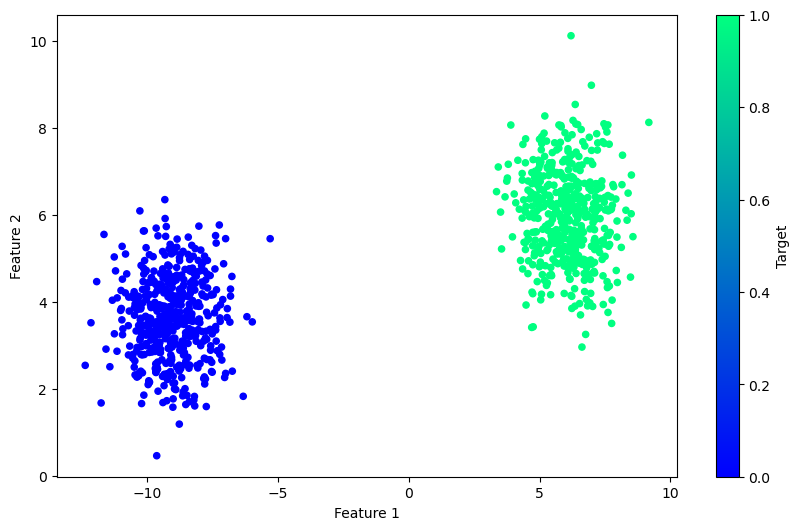

In [4]:
df.plot.scatter(x       ='Feature 1',
                y       ='Feature 2',
                c       ='Target',
                colormap='winter');

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)
X_train, X_test, y_train, y_test

(array([[  5.28818456,   5.7074564 ],
        [  4.72152505,   6.20396168],
        [  4.74139896,   4.85704888],
        ...,
        [  7.5717899 ,   6.13551643],
        [ -9.86869499,   3.12755373],
        [-10.04958516,   2.99708244]]),
 array([[  4.61079521,   5.96150068],
        [  4.79476379,   5.93384542],
        [ -8.92289507,   3.7777927 ],
        [  6.29305703,   6.85499377],
        [-10.31853866,   2.37287357],
        [ -9.1303534 ,   4.2102661 ],
        [-10.04251887,   4.05696661],
        [  6.80056426,   4.78540187],
        [ -8.19966803,   4.63949043],
        [  6.24237294,   7.17597283],
        [  6.37100886,   6.11794276],
        [-10.1539871 ,   5.63243698],
        [ -7.39372699,   5.52643741],
        [  4.74054807,   4.19214052],
        [ -6.82218763,   4.29768887],
        [  6.26446688,   4.8853355 ],
        [  5.66406906,   5.37999153],
        [  6.56624644,   3.7044451 ],
        [ -7.00907092,   2.36133328],
        [ -9.88902414,   3.94448949

In [6]:
X_scaler = skl.preprocessing.StandardScaler()
X_scaler

StandardScaler()

In [7]:
X_scaler.fit(X=X_train)

StandardScaler()

In [8]:
X_train_scaled = X_scaler.transform(X=X_train)
X_train_scaled

array([[ 0.91065062,  0.56798498],
       [ 0.83589939,  0.89306994],
       [ 0.83852107,  0.01118386],
       ...,
       [ 1.21189377,  0.84825567],
       [-1.08877814, -1.12119659],
       [-1.11264037, -1.20662218]])

In [9]:
X_test_scaled = X_scaler.transform(X=X_test)
X_test_scaled

array([[ 0.8212924 ,  0.73431952],
       [ 0.84556072,  0.71621234],
       [-0.96401238, -0.69545507],
       [ 1.04320896,  1.31933076],
       [-1.14811953, -1.61532059],
       [-0.99137937, -0.41229474],
       [-1.11170822, -0.512667  ],
       [ 1.11015708, -0.03572675],
       [-0.86860745, -0.13126172],
       [ 1.03652294,  1.52949059],
       [ 1.05349203,  0.83674938],
       [-1.12641261,  0.5188663 ],
       [-0.76229126,  0.44946348],
       [ 0.83840882, -0.4241624 ],
       [-0.68689631, -0.35505501],
       [ 1.03943748,  0.02970441],
       [ 0.96023564,  0.35357859],
       [ 1.07924691, -0.74347914],
       [-0.71154913, -1.62287655],
       [-1.09145987, -0.58631098],
       [-0.84760147, -0.81128108],
       [-1.00016013, -0.11256642],
       [ 1.00656572,  0.25564969],
       [ 0.79240083,  0.98677907],
       [-0.99280565, -0.90149462],
       [-1.13545766, -1.21831129],
       [-1.1310005 , -0.36087418],
       [-1.06042864, -0.65525975],
       [-0.62275726,

In [10]:
nn_model = tf.keras.models.Sequential()
nn_model

Metal device set to: Apple M1 Max

systemMemory: 64.00 GB
maxCacheSize: 24.00 GB



2023-01-28 13:58:52.872556: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-28 13:58:52.872729: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [11]:
nn_model.add(tf.keras.layers.Dense(units     =1,
                                   activation='relu',
                                   input_dim =2))
nn_model.add(tf.keras.layers.Dense(units     =1,
                                   activation='sigmoid'))
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [12]:
nn_model.compile(loss     ='binary_crossentropy',
                 optimizer='adam',
                 metrics  =['accuracy'])

---

#### 19.2.3 Train and test a basic neural network

In [13]:
fit_model = nn_model.fit(x     =X_train_scaled,
                         y     =y_train,
                         epochs=100)
fit_model

Epoch 1/100


2023-01-28 13:58:53.281882: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-01-28 13:58:53.504050: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 1s 10ms/step - loss: 1.0316 - accuracy: 0.0253
Epoch 2/100
24/24 [==============================] - 0s 7ms/step - loss: 1.0008 - accuracy: 0.0040
Epoch 3/100
24/24 [==============================] - 0s 7ms/step - loss: 0.9733 - accuracy: 0.0040
Epoch 4/100
24/24 [==============================] - 0s 7ms/step - loss: 0.9475 - accuracy: 0.0053
Epoch 5/100
24/24 [==============================] - 0s 8ms/step - loss: 0.9247 - accuracy: 0.0053
Epoch 6/100
24/24 [==============================] - 0s 7ms/step - loss: 0.9038 - accuracy: 0.0067
Epoch 7/100
24/24 [==============================] - 0s 6ms/step - loss: 0.8849 - accuracy: 0.0107
Epoch 8/100
24/24 [==============================] - 0s 7ms/step - loss: 0.8680 - accuracy: 0.0147
Epoch 9/100
24/24 [==============================] - 0s 8ms/step - loss: 0.8526 - accuracy: 0.0213
Epoch 10/100
24/24 [==============================] - 0s 7ms/step - loss: 0.8388 - accuracy: 0.0267
Epoch 11/100
24/24 [

In [14]:
history_df = pd.DataFrame(data =fit_model.history,
                          index=range(1, len(fit_model.history['loss']) + 1))
history_df

,loss,accuracy
1,1.031559,0.025333
2,1.000774,0.004000
3,0.973319,0.004000
4,0.947520,0.005333
5,0.924685,0.005333
...,...,...
96,0.692934,0.506667
97,0.692908,0.506667
98,0.692913,0.506667
99,0.692867,0.506667


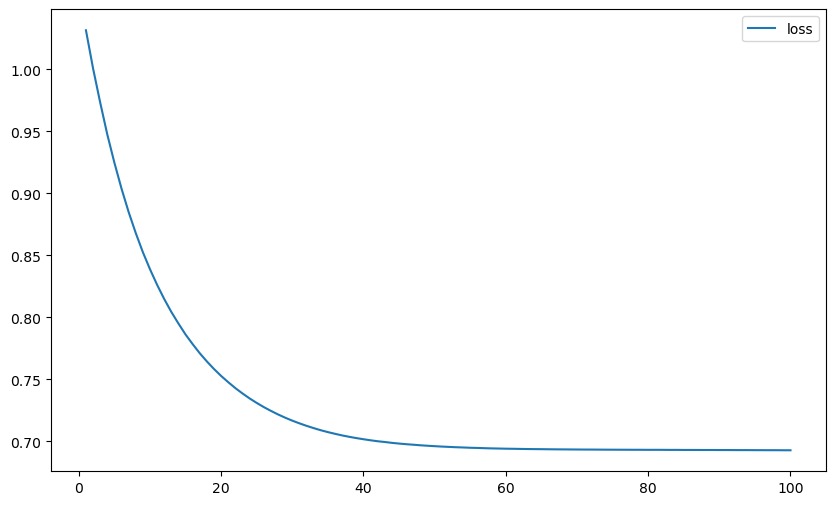

In [15]:
history_df.plot(y='loss');

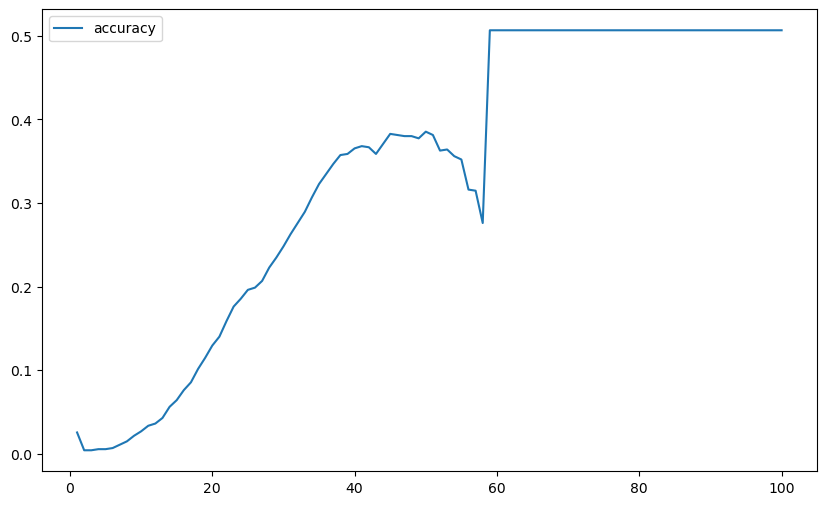

In [16]:
history_df.plot(y='accuracy');

In [17]:
model_loss, model_accuracy = nn_model.evaluate(x      =X_test_scaled,
                                               y      =y_test,
                                               verbose=2)
model_loss, model_accuracy

8/8 - 0s - loss: 0.6936 - accuracy: 0.4800 - 182ms/epoch - 23ms/step


2023-01-28 13:59:11.286933: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


(0.6935752034187317, 0.48000001907348633)

In [18]:
print(f'Loss: {model_loss}, Accuracy: {model_accuracy}')

Loss: 0.6935752034187317, Accuracy: 0.48000001907348633


In [19]:
new_X, new_Y = make_blobs(n_samples   =10,
                          centers     =2,
                          n_features  =2,
                          random_state=78)
new_X, new_Y

(array([[-8.40574697,  3.84431724],
        [ 8.06676769,  6.23218013],
        [-9.05453048,  2.9696282 ],
        [ 6.12944569,  6.99880057],
        [-9.0971638 ,  4.12452221],
        [-9.91294364,  4.44778341],
        [ 6.66806121,  5.61709584],
        [ 4.81836869,  4.75782195],
        [ 4.90984509,  5.66661528],
        [-9.55393487,  4.29570794]]),
 array([0, 1, 0, 1, 0, 0, 1, 1, 1, 0]))

In [20]:
new_X_scaled = X_scaler.transform(X=new_X)
new_X_scaled

array([[-0.89579248, -0.65189838],
       [ 1.27718906,  0.91154587],
       [-0.98137714, -1.22459774],
       [ 1.02162608,  1.41348772],
       [-0.98700114, -0.46843523],
       [-1.09461522, -0.25678118],
       [ 1.09267786,  0.50882174],
       [ 0.84867458, -0.0537846 ],
       [ 0.86074174,  0.54124441],
       [-1.04725637, -0.35635202]])

In [21]:
(nn_model.predict(x=new_X_scaled) > 0.5).astype('int32')

1/1 [==============================] - 0s 47ms/step


2023-01-28 13:59:11.608303: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]], dtype=int32)

---

In [22]:
X_moons, y_moons = make_moons(n_samples   =1_000,
                              noise       =0.08,
                              random_state=78)
X_moons, y_moons

(array([[ 0.6762172 ,  0.81522039],
        [ 1.48714334, -0.21051853],
        [-1.02770863,  0.35496587],
        ...,
        [ 1.86504433,  0.08625586],
        [-0.83650701,  0.16733796],
        [ 0.76962525, -0.52529204]]),
 array([0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
        0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
        1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
        1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
        0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
        0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
        0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
        1, 1, 0, 0, 1, 0, 0, 

In [23]:
y_moons = y_moons.reshape(-1, 1)
y_moons

array([[0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
    

In [24]:
df_moons = pd.DataFrame(data   =X_moons,
                        columns=['Feature 1', 'Feature 2'])
df_moons

,Feature 1,Feature 2
0,0.676217,0.815220
1,1.487143,-0.210519
2,-1.027709,0.354966
3,0.236012,1.025531
4,1.856695,-0.042783
...,...,...
995,0.816425,0.584748
996,0.864083,0.195920
997,1.865044,0.086256
998,-0.836507,0.167338


In [25]:
df_moons['Target'] = y_moons
df_moons

,Feature 1,Feature 2,Target
0,0.676217,0.815220,0
1,1.487143,-0.210519,1
2,-1.027709,0.354966,0
3,0.236012,1.025531,0
4,1.856695,-0.042783,1
...,...,...,...
995,0.816425,0.584748,0
996,0.864083,0.195920,0
997,1.865044,0.086256,1
998,-0.836507,0.167338,0


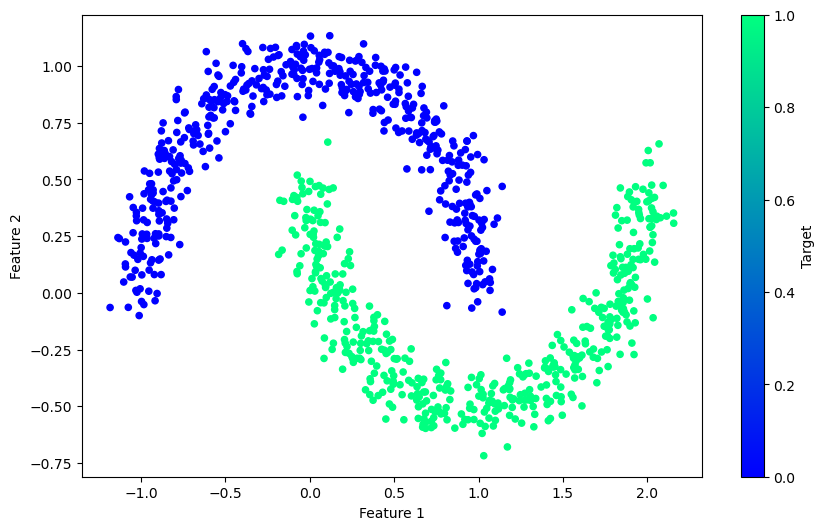

In [26]:
df_moons.plot.scatter(x       ='Feature 1',
                      y       ='Feature 2',
                      c       ='Target',
                      colormap='winter');

In [27]:
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(X_moons, y_moons, random_state=78)
X_moon_train, X_moon_test, y_moon_train, y_moon_test

(array([[ 1.90508129,  0.41045052],
        [-0.31676576,  0.91707236],
        [ 0.69328426,  0.60698252],
        ...,
        [ 0.86717346,  0.45695796],
        [ 1.91993656, -0.07981168],
        [-0.07442511,  0.5191878 ]]),
 array([[-0.7785856 ,  0.8966093 ],
        [ 1.99102402,  0.14819537],
        [-0.44026071,  0.94086424],
        [-0.74003574,  0.57022669],
        [ 1.08019002, -0.47775134],
        [-0.03283982,  1.09576505],
        [-0.6915038 ,  0.66935129],
        [ 0.82982714, -0.47085843],
        [-0.74233863,  0.79349475],
        [ 0.06473181,  0.43476912],
        [ 2.04348278,  0.13535145],
        [ 1.29800492, -0.3100957 ],
        [ 0.1385089 ,  0.46263264],
        [ 0.47242634, -0.21272141],
        [ 1.88602486,  0.01907568],
        [ 1.71253494, -0.08588996],
        [-0.86943638,  0.74947337],
        [ 1.59853083, -0.28718109],
        [ 0.73553807,  0.63887417],
        [ 1.33284506, -0.53581808],
        [ 0.11441356,  0.45605533],
        [ 2.0

In [28]:
X_moon_scaler = skl.preprocessing.StandardScaler()
X_moon_scaler

StandardScaler()

In [29]:
X_moon_scaler.fit(X_moon_train)

StandardScaler()

In [30]:
X_moon_train_scaled = X_moon_scaler.transform(X=X_moon_train)
X_moon_train_scaled

array([[ 1.62420595,  0.26413243],
       [-0.88767348,  1.2989201 ],
       [ 0.25422505,  0.66555392],
       ...,
       [ 0.45081315,  0.35912503],
       [ 1.64100038, -0.73724028],
       [-0.6136985 ,  0.48623102]])

In [31]:
X_moon_test_scaled = X_moon_scaler.transform(X=X_moon_test)
X_moon_test_scaled

array([[-1.40977771,  1.25712379],
       [ 1.72136735, -0.27153021],
       [-1.02728905,  1.34751561],
       [-1.36619568,  0.59047922],
       [ 0.69163617, -1.5500419 ],
       [-0.56668481,  1.66390436],
       [-1.31132856,  0.79294367],
       [ 0.40859177, -1.53596295],
       [-1.36879919,  1.04650977],
       [-0.45637652,  0.31380379],
       [ 1.7806739 , -0.29776424],
       [ 0.93788389, -1.20760108],
       [-0.37296881,  0.37071571],
       [ 0.00453709, -1.00871168],
       [ 1.60266195, -0.53526039],
       [ 1.40652525, -0.74965531],
       [-1.51248784,  0.95659501],
       [ 1.27763943, -1.16079743],
       [ 0.30199452,  0.7306934 ],
       [ 0.97727194, -1.66864465],
       [-0.40020948,  0.35728139],
       [ 1.75017983,  0.01781068],
       [-0.37155174, -1.02810239],
       [-1.22283322,  1.20791324],
       [ 0.03906012,  1.2963988 ],
       [ 0.23294138, -1.46797454],
       [-0.19777684,  1.21448681],
       [ 0.97125256, -1.78148679],
       [-0.04846963,

In [32]:
model_moon = nn_model.fit(x      =X_moon_train_scaled,
                          y      =y_moon_train,
                          epochs =100,
                          shuffle=True)
model_moon

Epoch 1/100


2023-01-28 13:59:12.253791: W tensorflow/core/common_runtime/forward_type_inference.cc:231] Type inference failed. This indicates an invalid graph that escaped type checking. Error message: INVALID_ARGUMENT: expected compatible input types, but input 1:
type_id: TFT_OPTIONAL
args {
  type_id: TFT_PRODUCT
  args {
    type_id: TFT_TENSOR
    args {
      type_id: TFT_BOOL
    }
  }
}
 is neither a subtype nor a supertype of the combined inputs preceding it:
type_id: TFT_OPTIONAL
args {
  type_id: TFT_PRODUCT
  args {
    type_id: TFT_TENSOR
    args {
      type_id: TFT_LEGACY_VARIANT
    }
  }
}

	while inferring type of node 'binary_crossentropy/cond/output/_10'
2023-01-28 13:59:12.256216: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 1s 13ms/step - loss: 0.6924 - accuracy: 0.5307
Epoch 2/100
24/24 [==============================] - 0s 8ms/step - loss: 0.6923 - accuracy: 0.5307
Epoch 3/100
24/24 [==============================] - 0s 8ms/step - loss: 0.6922 - accuracy: 0.5307
Epoch 4/100
24/24 [==============================] - 0s 9ms/step - loss: 0.6920 - accuracy: 0.5307
Epoch 5/100
24/24 [==============================] - 0s 8ms/step - loss: 0.6919 - accuracy: 0.5307
Epoch 6/100
24/24 [==============================] - 0s 8ms/step - loss: 0.6919 - accuracy: 0.5307
Epoch 7/100
24/24 [==============================] - 0s 8ms/step - loss: 0.6918 - accuracy: 0.5307
Epoch 8/100
24/24 [==============================] - 0s 10ms/step - loss: 0.6918 - accuracy: 0.5307
Epoch 9/100
24/24 [==============================] - 0s 9ms/step - loss: 0.6917 - accuracy: 0.5307
Epoch 10/100
24/24 [==============================] - 0s 8ms/step - loss: 0.6917 - accuracy: 0.5307
Epoch 11/100
24/24 

In [33]:
history_df = pd.DataFrame(data =model_moon.history,
                          index=range(1, len(model_moon.history['loss']) + 1))
history_df

,loss,accuracy
1,0.692398,0.530667
2,0.692267,0.530667
3,0.692200,0.530667
4,0.692016,0.530667
5,0.691939,0.530667
...,...,...
96,0.691177,0.530667
97,0.691208,0.530667
98,0.691133,0.530667
99,0.691098,0.530667


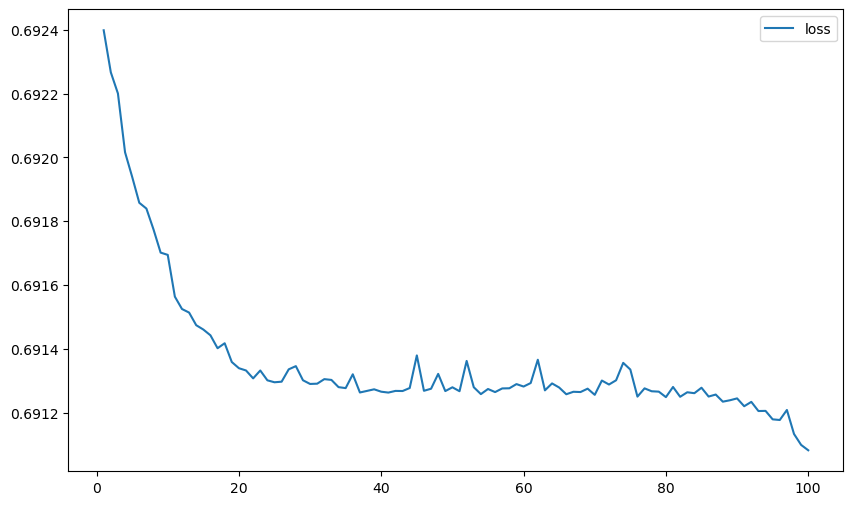

In [34]:
history_df.plot(y='loss');

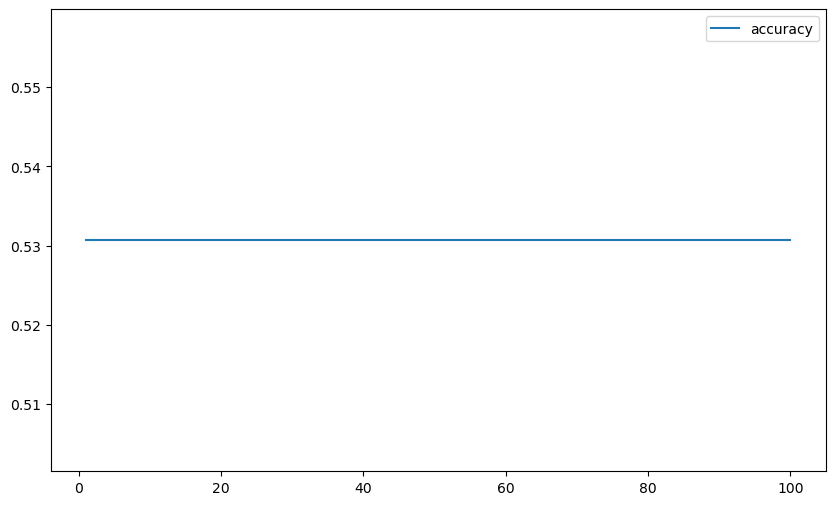

In [35]:
history_df.plot(y='accuracy');

---

In [36]:
new_model = tf.keras.models.Sequential()
new_model

In [37]:
number_inputs       = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units     =number_hidden_nodes,
                                    activation='relu',
                                    input_dim =number_inputs))
new_model.add(tf.keras.layers.Dense(units     =1,
                                    activation='sigmoid'))
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 6)                 18        
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


In [38]:
new_model.compile(loss     ='binary_crossentropy',
                  optimizer='adam',
                  metrics  =['accuracy'])

In [39]:
new_fit_model = new_model.fit(x      =X_moon_train_scaled,
                              y      =y_moon_train,
                              epochs =100,
                              shuffle=True)
new_fit_model

Epoch 1/100
 8/24 [=========>....................] - ETA: 0s - loss: 0.6135 - accuracy: 0.6250

2023-01-28 13:59:34.258705: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 0s 9ms/step - loss: 0.6334 - accuracy: 0.5813
Epoch 2/100
24/24 [==============================] - 0s 7ms/step - loss: 0.5978 - accuracy: 0.6147
Epoch 3/100
24/24 [==============================] - 0s 7ms/step - loss: 0.5664 - accuracy: 0.6400
Epoch 4/100
24/24 [==============================] - 0s 7ms/step - loss: 0.5393 - accuracy: 0.6573
Epoch 5/100
24/24 [==============================] - 0s 8ms/step - loss: 0.5152 - accuracy: 0.6827
Epoch 6/100
24/24 [==============================] - 0s 7ms/step - loss: 0.4944 - accuracy: 0.7080
Epoch 7/100
24/24 [==============================] - 0s 7ms/step - loss: 0.4757 - accuracy: 0.7200
Epoch 8/100
24/24 [==============================] - 0s 7ms/step - loss: 0.4588 - accuracy: 0.7333
Epoch 9/100
24/24 [==============================] - 0s 7ms/step - loss: 0.4437 - accuracy: 0.7440
Epoch 10/100
24/24 [==============================] - 0s 8ms/step - loss: 0.4301 - accuracy: 0.7653
Epoch 11/100
24/24 [=

---

In [40]:
ramen_df = pd.read_csv(filepath_or_buffer='ramen-ratings.csv')
ramen_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review #  2580 non-null   int64 
 1   Brand     2580 non-null   object
 2   Variety   2580 non-null   object
 3   Style     2578 non-null   object
 4   Country   2580 non-null   object
 5   Stars     2580 non-null   object
 6   Top Ten   41 non-null     object
dtypes: int64(1), object(6)
memory usage: 141.2+ KB


In [41]:
country_counts = ramen_df.Country.value_counts()
country_counts

Japan            352
USA              323
South Korea      309
Taiwan           224
Thailand         191
China            169
Malaysia         156
Hong Kong        137
Indonesia        126
Singapore        109
Vietnam          108
UK                69
Philippines       47
Canada            41
India             31
Germany           27
Mexico            25
Australia         22
Netherlands       15
Myanmar           14
Nepal             14
Pakistan           9
Hungary            9
Bangladesh         7
Colombia           6
Brazil             5
Cambodia           5
Fiji               4
Holland            4
Poland             4
Finland            3
Sarawak            3
Sweden             3
Dubai              3
Ghana              2
Estonia            2
Nigeria            1
United States      1
Name: Country, dtype: int64

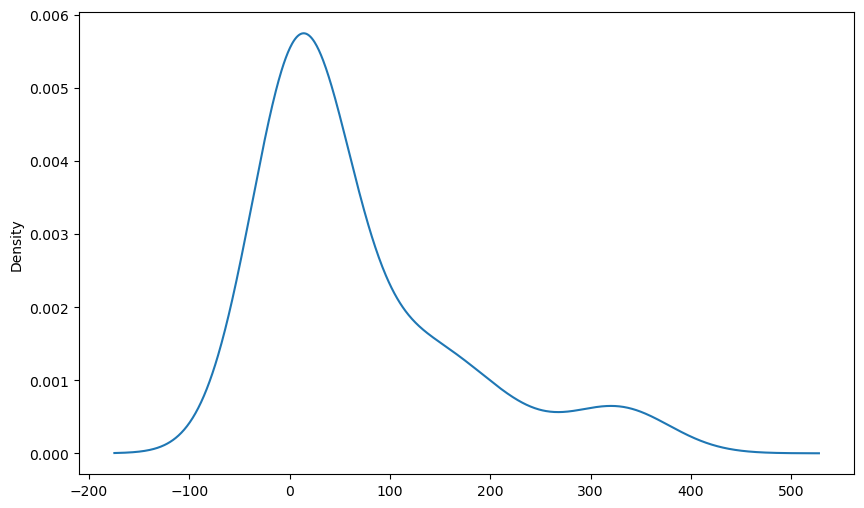

In [42]:
country_counts.plot.density();

In [43]:
replace_countries = list(country_counts[country_counts < 100].index)
replace_countries

['UK',
 'Philippines',
 'Canada',
 'India',
 'Germany',
 'Mexico',
 'Australia',
 'Netherlands',
 'Myanmar',
 'Nepal',
 'Pakistan',
 'Hungary',
 'Bangladesh',
 'Colombia',
 'Brazil',
 'Cambodia',
 'Fiji',
 'Holland',
 'Poland',
 'Finland',
 'Sarawak',
 'Sweden',
 'Dubai',
 'Ghana',
 'Estonia',
 'Nigeria',
 'United States']

In [44]:
for country in replace_countries:
  ramen_df.Country = ramen_df.Country.replace(to_replace=country,
                                              value     ='Other')
ramen_df.Country.value_counts()

Other          376
Japan          352
USA            323
South Korea    309
Taiwan         224
Thailand       191
China          169
Malaysia       156
Hong Kong      137
Indonesia      126
Singapore      109
Vietnam        108
Name: Country, dtype: int64

In [45]:
enc = OneHotEncoder(sparse_output=False) # `OneHotEncoder(sparse=False)` in older versions
enc

OneHotEncoder(sparse_output=False)

In [46]:
encode_df = pd.DataFrame(data=enc.fit_transform(X=ramen_df.Country.values.reshape(-1, 1)))
encode_df

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2575,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2576,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2577,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2578,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [47]:
encode_df.columns = enc.get_feature_names_out(['Country']) # `enc.get_feature_names(['Country'])` in older versions
encode_df

,Country_China,Country_Hong Kong,Country_Indonesia,Country_Japan,Country_Malaysia,Country_Other,Country_Singapore,Country_South Korea,Country_Taiwan,Country_Thailand,Country_USA,Country_Vietnam
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2575,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2576,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2577,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2578,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [48]:
ramen_df.merge(right      =encode_df,
               left_index =True,
               right_index=True)\
        .drop(labels='Country',
              axis  =1)

,Review #,Brand,Variety,Style,Stars,Top Ten,Country_China,Country_Hong Kong,Country_Indonesia,Country_Japan,Country_Malaysia,Country_Other,Country_Singapore,Country_South Korea,Country_Taiwan,Country_Thailand,Country_USA,Country_Vietnam
0,2580,New Touch,T's Restaurant Tantanmen,Cup,3.75,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,2.25,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,2.75,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2576,Ching's Secret,Singapore Curry,Pack,3.75,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,5,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,3.5,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2576,4,Wai Wai,Oriental Style Instant Noodles,Pack,1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2577,3,Wai Wai,Tom Yum Shrimp,Pack,2,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2578,2,Wai Wai,Tom Yum Chili Flavor,Pack,2,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


---

In [49]:
hr_df = pd.read_csv(filepath_or_buffer='hr_dataset.csv')
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Satisfaction_Level  29 non-null     float64
 1   Num_Projects        29 non-null     int64  
 2   Time_Spent          29 non-null     int64  
 3   Num_Promotions      29 non-null     int64  
dtypes: float64(1), int64(3)
memory usage: 1.0 KB


In [50]:
scaler = StandardScaler()
scaler

StandardScaler()

In [51]:
scaler.fit(X=hr_df)

StandardScaler()

In [52]:
scaled_data = scaler.transform(X=hr_df)
scaled_data

array([[-1.3036154 , -1.16247639, -1.04948051, -0.55865556],
       [-1.51294456, -1.16247639, -1.09460336, -1.80488718],
       [ 1.20833454,  0.86023253,  1.18708024,  1.31069188],
       [ 0.16168873,  0.18599622, -0.03038526,  0.06446026],
       [-0.46629875, -0.48824008, -0.59654929, -0.55865556],
       [-0.88495708, -0.48824008, -0.67913261, -0.55865556],
       [ 0.99900538,  0.86023253,  0.92315415,  0.68757607],
       [ 1.20833454,  1.53446883,  1.2517847 ,  0.68757607],
       [-1.93160288, -1.83671269, -1.20698479, -1.18177137],
       [ 1.62699286,  1.53446883,  1.65022796,  1.93380769],
       [ 0.37101789,  0.18599622,  0.48639905,  0.06446026],
       [-1.59667623, -1.16247639, -0.95668069, -1.18177137],
       [-0.55003042, -1.16247639, -0.77789205, -0.55865556],
       [-0.84309124, -0.48824008, -0.81705528, -0.55865556],
       [-0.25696959,  0.18599622, -0.68424086, -0.55865556],
       [ 0.37101789,  0.86023253,  0.07603655,  0.68757607],
       [ 0.16168873,  0.

In [53]:
transformed_scaled_data = pd.DataFrame(data   =scaled_data,
                                       columns=hr_df.columns)
transformed_scaled_data

,Satisfaction_Level,Num_Projects,Time_Spent,Num_Promotions
0,-1.303615,-1.162476,-1.049481,-0.558656
1,-1.512945,-1.162476,-1.094603,-1.804887
2,1.208335,0.860233,1.187080,1.310692
3,0.161689,0.185996,-0.030385,0.064460
4,-0.466299,-0.488240,-0.596549,-0.558656
5,-0.884957,-0.488240,-0.679133,-0.558656
6,0.999005,0.860233,0.923154,0.687576
7,1.208335,1.534469,1.251785,0.687576
8,-1.931603,-1.836713,-1.206985,-1.181771
9,1.626993,1.534469,1.650228,1.933808


---

In [54]:
attrition_df = pd.read_csv(filepath_or_buffer='HR-Employee-Attrition.csv')
attrition_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [55]:
attrition_cat = attrition_df.dtypes[attrition_df.dtypes=='object'].index.tolist()
attrition_cat

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

---

In [56]:
attrition_df[attrition_cat].nunique()

Attrition         2
BusinessTravel    3
Department        3
EducationField    6
Gender            2
JobRole           9
MaritalStatus     3
Over18            1
OverTime          2
dtype: int64

In [57]:
enc = OneHotEncoder(sparse_output=False)
enc

OneHotEncoder(sparse_output=False)

In [58]:
encode_df = pd.DataFrame(data=enc.fit_transform(X=attrition_df[attrition_cat]))
encode_df

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1466,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1467,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1468,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [59]:
encode_df.columns = enc.get_feature_names_out(input_features=attrition_cat)
encode_df

,Attrition_No,Attrition_Yes,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1466,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1467,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1468,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [60]:
attrition_df = attrition_df.merge(right      =encode_df,
                                  left_index =True,
                                  right_index=True)
attrition_df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [61]:
attrition_df = attrition_df.drop(labels=attrition_cat,
                                 axis  =1)
attrition_df

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
1,49,279,8,1,1,2,3,61,2,2,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,37,1373,2,2,1,4,4,92,2,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
3,33,1392,3,4,1,5,4,56,3,1,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,27,591,2,1,1,7,1,40,3,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,1,2061,3,41,4,2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1466,39,613,6,1,1,2062,4,42,2,3,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1467,27,155,4,3,1,2064,2,87,4,2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1468,49,1023,2,3,1,2065,4,63,2,2,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [62]:
X, y = attrition_df.drop(labels=['Attrition_Yes', 'Attrition_No'], axis=1).values, attrition_df['Attrition_Yes'].values
X, y

(array([[  41., 1102.,    1., ...,    1.,    0.,    1.],
        [  49.,  279.,    8., ...,    1.,    1.,    0.],
        [  37., 1373.,    2., ...,    1.,    0.,    1.],
        ...,
        [  27.,  155.,    4., ...,    1.,    0.,    1.],
        [  49., 1023.,    2., ...,    1.,    1.,    0.],
        [  34.,  628.,    8., ...,    1.,    1.,    0.]]),
 array([1., 0., 1., ..., 0., 0., 0.]))

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)
X_train, X_test, y_train, y_test

(array([[  33.,  118.,   16., ...,    1.,    1.,    0.],
        [  25.,  675.,    5., ...,    1.,    1.,    0.],
        [  36., 1456.,   13., ...,    1.,    0.,    1.],
        ...,
        [  35.,  464.,    4., ...,    1.,    1.,    0.],
        [  24.,  535.,   24., ...,    1.,    1.,    0.],
        [  31.,  335.,    9., ...,    1.,    0.,    1.]]),
 array([[  38., 1495.,   10., ...,    1.,    1.,    0.],
        [  29.,  441.,    8., ...,    1.,    1.,    0.],
        [  42., 1474.,    5., ...,    1.,    1.,    0.],
        ...,
        [  40., 1171.,   10., ...,    1.,    0.,    1.],
        [  35.,  664.,    1., ...,    1.,    1.,    0.],
        [  50.,  264.,    9., ...,    1.,    0.,    1.]]),
 array([1., 0., 1., ..., 0., 0., 1.]),
 array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0.,

In [64]:
scaler = StandardScaler()
scaler

StandardScaler()

In [65]:
X_scaler = scaler.fit(X=X_train)
X_scaler

StandardScaler()

In [66]:
X_train_scaled = X_scaler.transform(X=X_train)
X_train_scaled

array([[-0.40942386, -1.6948152 ,  0.87475435, ...,  0.        ,
         0.61581168, -0.61581168],
       [-1.29889668, -0.310834  , -0.50720476, ...,  0.        ,
         0.61581168, -0.61581168],
       [-0.07587155,  1.62972131,  0.49785641, ...,  0.        ,
        -1.62387305,  1.62387305],
       ...,
       [-0.18705565, -0.83510695, -0.63283741, ...,  0.        ,
         0.61581168, -0.61581168],
       [-1.41008078, -0.65869283,  1.87981553, ...,  0.        ,
         0.61581168, -0.61581168],
       [-0.63179206, -1.15563401, -0.00467417, ...,  0.        ,
        -1.62387305,  1.62387305]])

In [67]:
X_test_scaled = X_scaler.transform(X=X_test)
X_test_scaled

array([[ 0.14649666,  1.72662484,  0.12095847, ...,  0.        ,
         0.61581168, -0.61581168],
       [-0.85416027, -0.89225519, -0.13030682, ...,  0.        ,
         0.61581168, -0.61581168],
       [ 0.59123307,  1.67444602, -0.50720476, ...,  0.        ,
         0.61581168, -0.61581168],
       ...,
       [ 0.36886486,  0.92158013,  0.12095847, ...,  0.        ,
        -1.62387305,  1.62387305],
       [-0.18705565, -0.33816577, -1.00973535, ...,  0.        ,
         0.61581168, -0.61581168],
       [ 1.48070589, -1.33204813, -0.00467417, ...,  0.        ,
        -1.62387305,  1.62387305]])

---

In [68]:
number_input_features = len(X_train[0])
number_input_features

55

In [69]:
hidden_nodes_layer1 = 8
hidden_nodes_layer2 = 5

nn = tf.keras.models.Sequential()
nn

In [70]:
nn.add(tf.keras.layers.Dense(units     =hidden_nodes_layer1,
                             input_dim =number_input_features,
                             activation='relu'))
nn.add(tf.keras.layers.Dense(units     =hidden_nodes_layer2,
                             activation='relu'))
nn.add(tf.keras.layers.Dense(units     =1,
                             activation='sigmoid'))
nn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 8)                 448       
                                                                 
 dense_5 (Dense)             (None, 5)                 45        
                                                                 
 dense_6 (Dense)             (None, 1)                 6         
                                                                 
Total params: 499
Trainable params: 499
Non-trainable params: 0
_________________________________________________________________


In [71]:
nn.compile(loss     ='binary_crossentropy',
           optimizer='adam',
           metrics  =['accuracy'])

---

In [72]:
fit_model = nn.fit(x     =X_train,
                   y     =y_train,
                   epochs=100)
fit_model

Epoch 1/100
 1/35 [..............................] - ETA: 9s - loss: 806.5668 - accuracy: 0.8750

2023-01-28 13:59:53.839510: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


35/35 [==============================] - 1s 10ms/step - loss: 335.0258 - accuracy: 0.8076
Epoch 2/100
35/35 [==============================] - 0s 7ms/step - loss: 189.7447 - accuracy: 0.7704
Epoch 3/100
35/35 [==============================] - 0s 7ms/step - loss: 120.8801 - accuracy: 0.7623
Epoch 4/100
35/35 [==============================] - 0s 7ms/step - loss: 39.4831 - accuracy: 0.5209
Epoch 5/100
35/35 [==============================] - 0s 8ms/step - loss: 15.3256 - accuracy: 0.6869
Epoch 6/100
35/35 [==============================] - 0s 7ms/step - loss: 9.0168 - accuracy: 0.8194
Epoch 7/100
35/35 [==============================] - 0s 9ms/step - loss: 5.4863 - accuracy: 0.8203
Epoch 8/100
35/35 [==============================] - 0s 9ms/step - loss: 3.9296 - accuracy: 0.8221
Epoch 9/100
35/35 [==============================] - 0s 8ms/step - loss: 3.1228 - accuracy: 0.8230
Epoch 10/100
35/35 [==============================] - 0s 7ms/step - loss: 2.3465 - accuracy: 0.8249
Epoch 11/100

In [73]:
model_loss, model_accuracy = nn.evaluate(x      =X_test,
                                         y      =y_test,
                                         verbose=2)
model_loss, model_accuracy

12/12 - 0s - loss: 0.4549 - accuracy: 0.8723 - 220ms/epoch - 18ms/step


2023-01-28 14:00:22.351833: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


(0.45485708117485046, 0.8722826242446899)

In [74]:
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Loss: 0.45485708117485046, Accuracy: 0.8722826242446899


---

In [75]:
diabetes_df = pd.read_csv(filepath_or_buffer='diabetes.csv')
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [76]:
X, y = diabetes_df.drop(columns='Outcome'), diabetes_df.Outcome
X, y

(     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 0              6      148             72             35        0  33.6   
 1              1       85             66             29        0  26.6   
 2              8      183             64              0        0  23.3   
 3              1       89             66             23       94  28.1   
 4              0      137             40             35      168  43.1   
 ..           ...      ...            ...            ...      ...   ...   
 763           10      101             76             48      180  32.9   
 764            2      122             70             27        0  36.8   
 765            5      121             72             23      112  26.2   
 766            1      126             60              0        0  30.1   
 767            1       93             70             31        0  30.4   
 
      DiabetesPedigreeFunction  Age  
 0                       0.627   50  
 1                    

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=42,
                                                    stratify    =y)
X_train, X_test, y_train, y_test

(     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 751            1      121             78             39       74  39.0   
 358           12       88             74             40       54  35.3   
 718            1      108             60             46      178  35.5   
 536            0      105             90              0        0  29.6   
 651            1      117             60             23      106  33.8   
 ..           ...      ...            ...            ...      ...   ...   
 676            9      156             86              0        0  24.8   
 113            4       76             62              0        0  34.0   
 556            1       97             70             40        0  38.1   
 152            9      156             86             28      155  34.3   
 107            4      144             58             28      140  29.5   
 
      DiabetesPedigreeFunction  Age  
 751                     0.261   28  
 358                  

In [78]:
scaler = StandardScaler()
scaler

StandardScaler()

In [79]:
X_scaler = scaler.fit(X=X_train)
X_scaler

StandardScaler()

In [80]:
X_train_scaled = X_scaler.transform(X=X_train)
X_train_scaled

array([[-0.85547074,  0.00732864,  0.47259835, ...,  0.88301955,
        -0.65845729, -0.46648591],
       [ 2.46780492, -1.03224482,  0.2585074 , ...,  0.41193433,
        -0.30699915,  1.21865604],
       [-0.85547074, -0.4022003 , -0.49081095, ...,  0.43739839,
        -0.19585426, -0.8035143 ],
       ...,
       [-0.85547074, -0.74872478,  0.04441644, ...,  0.76843126,
        -0.78762567, -0.29797171],
       [ 1.56145701,  1.10990656,  0.90078026, ...,  0.28461399,
         2.12917653,  0.71311346],
       [ 0.05087717,  0.73187984, -0.59785643, ..., -0.3265236 ,
        -0.58035548,  0.29182797]])

In [81]:
X_test_scaled = X_scaler.transform(X=X_test)
X_test_scaled

array([[ 2.76992089, -0.5282092 ,  0.15146192, ..., -0.11007904,
        -0.04565848,  0.37608507],
       [ 0.05087717,  0.196342  ,  1.00782574, ...,  0.31007806,
         0.35386232, -0.46648591],
       [-0.55335477, -0.84323146,  0.36555287, ..., -0.0591509 ,
         0.50706202, -0.8877714 ],
       ...,
       [-1.15758671, -0.46520475,  0.04441644, ...,  0.93394769,
         0.37488973, -0.97202849],
       [ 0.35299314,  0.10183532,  0.2585074 , ...,  0.24641789,
        -0.78161784,  0.37608507],
       [-0.2512388 ,  0.22784423,  0.15146192, ...,  0.04270536,
         0.20667045, -0.55074301]])

In [82]:
log_classifier = LogisticRegression(solver  ='lbfgs',
                                    max_iter=200)
log_classifier

LogisticRegression(max_iter=200)

In [83]:
log_classifier.fit(X=X_train,
                   y=y_train)

LogisticRegression(max_iter=200)

In [84]:
y_pred = log_classifier.predict(X=X_test)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0])

In [85]:
print(f"Logistic regression model accuracy: {accuracy_score(y_test,y_pred):.3f}")

Logistic regression model accuracy: 0.729


In [86]:
nn_model = tf.keras.models.Sequential()
nn_model

In [87]:
nn_model.add(tf.keras.layers.Dense(units     =16,
                                   activation='relu',
                                   input_dim =8))
nn_model.add(tf.keras.layers.Dense(units     =1,
                                   activation='sigmoid'))
nn_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 16)                144       
                                                                 
 dense_8 (Dense)             (None, 1)                 17        
                                                                 
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________


In [88]:
nn_model.compile(loss     ='binary_crossentropy',
                 optimizer='adam',
                 metrics  =['accuracy'])

In [89]:
fit_model = nn_model.fit(x     =X_train_scaled,
                         y     =y_train,
                         epochs=50)
fit_model

Epoch 1/50
 9/18 [==============>...............] - ETA: 0s - loss: 0.7296 - accuracy: 0.6424

2023-01-28 14:00:23.290941: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


18/18 [==============================] - 0s 7ms/step - loss: 0.7458 - accuracy: 0.6076
Epoch 2/50
18/18 [==============================] - 0s 7ms/step - loss: 0.7032 - accuracy: 0.6319
Epoch 3/50
18/18 [==============================] - 0s 7ms/step - loss: 0.6654 - accuracy: 0.6458
Epoch 4/50
18/18 [==============================] - 0s 6ms/step - loss: 0.6343 - accuracy: 0.6615
Epoch 5/50
18/18 [==============================] - 0s 5ms/step - loss: 0.6081 - accuracy: 0.6892
Epoch 6/50
18/18 [==============================] - 0s 6ms/step - loss: 0.5860 - accuracy: 0.6944
Epoch 7/50
18/18 [==============================] - 0s 5ms/step - loss: 0.5667 - accuracy: 0.7118
Epoch 8/50
18/18 [==============================] - 0s 5ms/step - loss: 0.5507 - accuracy: 0.7222
Epoch 9/50
18/18 [==============================] - 0s 6ms/step - loss: 0.5369 - accuracy: 0.7378
Epoch 10/50
18/18 [==============================] - 0s 7ms/step - loss: 0.5249 - accuracy: 0.7517
Epoch 11/50
18/18 [===========

In [90]:
model_loss, model_accuracy = nn_model.evaluate(x      =X_test_scaled,
                                               y      =y_test,
                                               verbose=2)
model_loss, model_accuracy

6/6 - 0s - loss: 0.4702 - accuracy: 0.7500 - 117ms/epoch - 19ms/step


2023-01-28 14:00:28.978706: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


(0.47023090720176697, 0.75)

In [91]:
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Loss: 0.47023090720176697, Accuracy: 0.75


---

In [92]:
tele_df = pd.read_csv(filepath_or_buffer='bank_telemarketing.csv')
tele_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30477 entries, 0 to 30476
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             30477 non-null  int64 
 1   Job             30477 non-null  object
 2   Marital_Status  30477 non-null  object
 3   Education       30477 non-null  object
 4   Default_Credit  30477 non-null  object
 5   Housing_Loan    30477 non-null  object
 6   Personal_Loan   30477 non-null  object
 7   Subscribed      30477 non-null  object
dtypes: int64(1), object(7)
memory usage: 1.9+ MB


In [93]:
tele_cat = tele_df.dtypes[tele_df.dtypes=='object'].index.tolist()
tele_cat

['Job',
 'Marital_Status',
 'Education',
 'Default_Credit',
 'Housing_Loan',
 'Personal_Loan',
 'Subscribed']

In [94]:
tele_df[tele_cat].nunique()

Job               9
Marital_Status    3
Education         4
Default_Credit    2
Housing_Loan      2
Personal_Loan     2
Subscribed        2
dtype: int64

In [95]:
enc = OneHotEncoder(sparse_output=False)
enc

OneHotEncoder(sparse_output=False)

In [96]:
encode_df = pd.DataFrame(data=enc.fit_transform(X=tele_df[tele_cat]))
encode_df

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30472,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
30473,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
30474,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
30475,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [97]:
encode_df.columns = enc.get_feature_names_out(input_features=tele_cat)
encode_df

,Job_admin,Job_blue-collar,Job_entrepreneur,Job_management,Job_other,Job_retired,Job_self-employed,Job_services,Job_technician,Marital_Status_divorced,...,Education_Secondary_Education,Education_Tertiary_Education,Default_Credit_no,Default_Credit_yes,Housing_Loan_no,Housing_Loan_yes,Personal_Loan_no,Personal_Loan_yes,Subscribed_no,Subscribed_yes
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30472,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
30473,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
30474,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
30475,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [98]:
tele_df = tele_df.merge(right      =encode_df,
                        left_index =True,
                        right_index=True)
tele_df

,Age,Job,Marital_Status,Education,Default_Credit,Housing_Loan,Personal_Loan,Subscribed,Job_admin,Job_blue-collar,...,Education_Secondary_Education,Education_Tertiary_Education,Default_Credit_no,Default_Credit_yes,Housing_Loan_no,Housing_Loan_yes,Personal_Loan_no,Personal_Loan_yes,Subscribed_no,Subscribed_yes
0,56,other,married,Primary_Education,no,no,no,no,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,37,services,married,Secondary_Education,no,yes,no,no,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,40,admin,married,Primary_Education,no,no,no,no,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,56,services,married,Secondary_Education,no,no,yes,no,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,59,admin,married,Professional_Education,no,no,no,no,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30472,73,retired,married,Professional_Education,no,yes,no,yes,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
30473,46,blue-collar,married,Professional_Education,no,no,no,no,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
30474,56,retired,married,Tertiary_Education,no,yes,no,no,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
30475,44,technician,married,Professional_Education,no,no,no,yes,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [99]:
tele_df = tele_df.drop(labels=tele_cat,
                       axis  =1)
tele_df

,Age,Job_admin,Job_blue-collar,Job_entrepreneur,Job_management,Job_other,Job_retired,Job_self-employed,Job_services,Job_technician,...,Education_Secondary_Education,Education_Tertiary_Education,Default_Credit_no,Default_Credit_yes,Housing_Loan_no,Housing_Loan_yes,Personal_Loan_no,Personal_Loan_yes,Subscribed_no,Subscribed_yes
0,56,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,37,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,40,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,56,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,59,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30472,73,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
30473,46,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
30474,56,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
30475,44,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [100]:
X, y = tele_df.drop(columns=['Subscribed_no', 'Subscribed_yes']).values, tele_df.Subscribed_yes.values
X, y

(array([[56.,  0.,  0., ...,  0.,  1.,  0.],
        [37.,  0.,  0., ...,  1.,  1.,  0.],
        [40.,  1.,  0., ...,  0.,  1.,  0.],
        ...,
        [56.,  0.,  0., ...,  1.,  1.,  0.],
        [44.,  0.,  0., ...,  0.,  1.,  0.],
        [74.,  0.,  0., ...,  1.,  1.,  0.]]),
 array([0., 0., 0., ..., 0., 1., 0.]))

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=42,
                                                    stratify    =y)
X_train, X_test, y_train, y_test

(array([[54.,  0.,  0., ...,  1.,  1.,  0.],
        [57.,  0.,  0., ...,  0.,  1.,  0.],
        [43.,  0.,  1., ...,  1.,  1.,  0.],
        ...,
        [43.,  0.,  0., ...,  0.,  0.,  1.],
        [29.,  1.,  0., ...,  1.,  1.,  0.],
        [40.,  1.,  0., ...,  1.,  0.,  1.]]),
 array([[34.,  1.,  0., ...,  0.,  1.,  0.],
        [29.,  0.,  1., ...,  1.,  1.,  0.],
        [60.,  0.,  0., ...,  0.,  1.,  0.],
        ...,
        [25.,  0.,  0., ...,  0.,  1.,  0.],
        [33.,  0.,  1., ...,  1.,  1.,  0.],
        [35.,  0.,  0., ...,  1.,  1.,  0.]]),
 array([0., 1., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]))

In [102]:
scaler = StandardScaler()
scaler

StandardScaler()

In [103]:
X_scaler = scaler.fit(X=X_train)
X_scaler

StandardScaler()

In [104]:
X_train_scaled = X_scaler.transform(X=X_train)
X_train_scaled

array([[ 1.43713987, -0.634451  , -0.47985411, ...,  0.91758898,
         0.42686983, -0.42686983],
       [ 1.72527462, -0.634451  , -0.47985411, ..., -1.08981256,
         0.42686983, -0.42686983],
       [ 0.38064579, -0.634451  ,  2.08396671, ...,  0.91758898,
         0.42686983, -0.42686983],
       ...,
       [ 0.38064579, -0.634451  , -0.47985411, ..., -1.08981256,
        -2.3426345 ,  2.3426345 ],
       [-0.96398304,  1.57616585, -0.47985411, ...,  0.91758898,
         0.42686983, -0.42686983],
       [ 0.09251104,  1.57616585, -0.47985411, ...,  0.91758898,
        -2.3426345 ,  2.3426345 ]])

In [105]:
X_test_scaled = X_scaler.transform(X_test)
X_test_scaled

array([[-0.48375846,  1.57616585, -0.47985411, ..., -1.08981256,
         0.42686983, -0.42686983],
       [-0.96398304, -0.634451  ,  2.08396671, ...,  0.91758898,
         0.42686983, -0.42686983],
       [ 2.01340936, -0.634451  , -0.47985411, ..., -1.08981256,
         0.42686983, -0.42686983],
       ...,
       [-1.3481627 , -0.634451  , -0.47985411, ..., -1.08981256,
         0.42686983, -0.42686983],
       [-0.57980337, -0.634451  ,  2.08396671, ...,  0.91758898,
         0.42686983, -0.42686983],
       [-0.38771354, -0.634451  , -0.47985411, ...,  0.91758898,
         0.42686983, -0.42686983]])

In [106]:
svm = SVC(kernel='linear')
svm

SVC(kernel='linear')

In [107]:
svm.fit(X=X_train,
        y=y_train)

SVC(kernel='linear')

In [108]:
y_pred = svm.predict(X=X_test_scaled)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [109]:
print(f"SVM model accuracy: {accuracy_score(y_test,y_pred):.3f}")

SVM model accuracy: 0.873


In [110]:
number_input_features = len(X_train_scaled[0])
number_input_features

23

In [111]:
hidden_nodes_layer1 = 10
hidden_nodes_layer2 =  5

nn = tf.keras.models.Sequential()
nn

In [112]:
nn.add(tf.keras.layers.Dense(units     =hidden_nodes_layer1,
                             input_dim =number_input_features,
                             activation='relu'))
nn.add(tf.keras.layers.Dense(units     =hidden_nodes_layer2,
                             activation='relu'))
nn.add(tf.keras.layers.Dense(units     =1,
                             activation='sigmoid'))
nn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 10)                240       
                                                                 
 dense_10 (Dense)            (None, 5)                 55        
                                                                 
 dense_11 (Dense)            (None, 1)                 6         
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [113]:
nn.compile(loss     ='binary_crossentropy',
           optimizer='adam',
           metrics  =['accuracy'])

In [114]:
fit_model = nn.fit(x      =X_train_scaled,
                   y      =y_train,
                   epochs=50)
fit_model

Epoch 1/50
  1/715 [..............................] - ETA: 3:45 - loss: 0.7886 - accuracy: 0.4688

2023-01-28 14:00:40.182618: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


715/715 [==============================] - 6s 8ms/step - loss: 0.4435 - accuracy: 0.8377
Epoch 2/50
715/715 [==============================] - 6s 8ms/step - loss: 0.3744 - accuracy: 0.8731
Epoch 3/50
715/715 [==============================] - 6s 8ms/step - loss: 0.3704 - accuracy: 0.8735
Epoch 4/50
715/715 [==============================] - 5s 8ms/step - loss: 0.3688 - accuracy: 0.8735
Epoch 5/50
715/715 [==============================] - 5s 7ms/step - loss: 0.3675 - accuracy: 0.8735
Epoch 6/50
715/715 [==============================] - 5s 8ms/step - loss: 0.3670 - accuracy: 0.8734
Epoch 7/50
715/715 [==============================] - 6s 8ms/step - loss: 0.3666 - accuracy: 0.8737
Epoch 8/50
715/715 [==============================] - 6s 8ms/step - loss: 0.3660 - accuracy: 0.8734
Epoch 9/50
715/715 [==============================] - 6s 8ms/step - loss: 0.3657 - accuracy: 0.8739
Epoch 10/50
715/715 [==============================] - 6s 8ms/step - loss: 0.3649 - accuracy: 0.8734
Epoch 11/5

In [115]:
model_loss, model_accuracy = nn.evaluate(x      =X_test_scaled,
                                         y      =y_test,
                                         verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

2023-01-28 14:05:11.522672: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


239/239 - 1s - loss: 0.3682 - accuracy: 0.8731 - 1s/epoch - 5ms/step
Loss: 0.3682178556919098, Accuracy: 0.8730971217155457


---

In [116]:
loans_df = pd.read_csv(filepath_or_buffer='loan_status.csv')
loans_df

,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
0,Fully_Paid,99999999,Short_Term,741.0,2231892.0,8_years,Own_Home,Debt_Consolidation,29200.53,14.9,29.0,18,1,297996,750090.0,0.0,0.0
1,Fully_Paid,217646,Short_Term,730.0,1184194.0,<_1_year,Home_Mortgage,Debt_Consolidation,10855.08,19.6,10.0,13,1,122170,272052.0,1.0,0.0
2,Fully_Paid,548746,Short_Term,678.0,2559110.0,2_years,Rent,Debt_Consolidation,18660.28,22.6,33.0,4,0,437171,555038.0,0.0,0.0
3,Fully_Paid,99999999,Short_Term,728.0,714628.0,3_years,Rent,Debt_Consolidation,11851.06,16.0,76.0,16,0,203965,289784.0,0.0,0.0
4,Fully_Paid,99999999,Short_Term,740.0,776188.0,<_1_year,Own_Home,Debt_Consolidation,11578.22,8.5,25.0,6,0,134083,220220.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36418,Fully_Paid,99999999,Short_Term,742.0,1190046.0,<_1_year,Rent,Other,11969.81,20.1,16.0,9,0,37392,134442.0,0.0,0.0
36419,Fully_Paid,44484,Short_Term,717.0,1152426.0,10+_years,Home_Mortgage,Other,6280.64,21.0,12.0,6,0,961932,0.0,0.0,0.0
36420,Fully_Paid,210584,Short_Term,719.0,783389.0,1_year,Home_Mortgage,Other,3727.61,17.4,18.0,6,0,456,259160.0,0.0,0.0
36421,Fully_Paid,99999999,Short_Term,732.0,1289416.0,1_year,Rent,Debt_Consolidation,13109.05,9.4,21.0,22,0,153045,509234.0,0.0,0.0


In [117]:
loans_cat = loans_df.dtypes[loans_df.dtypes=='object'].index.tolist()
loans_cat

['Loan_Status', 'Term', 'Years_in_current_job', 'Home_Ownership', 'Purpose']

In [118]:
loans_df[loans_cat].nunique()

Loan_Status              2
Term                     2
Years_in_current_job    11
Home_Ownership           4
Purpose                  7
dtype: int64

In [119]:
loans_df.Years_in_current_job.value_counts()

10+_years    13149
2_years       3225
3_years       2997
<_1_year      2699
5_years       2487
4_years       2286
1_year        2247
6_years       2109
7_years       2082
8_years       1675
9_years       1467
Name: Years_in_current_job, dtype: int64

In [120]:
enc = OneHotEncoder(sparse_output=False)
enc

OneHotEncoder(sparse_output=False)

In [121]:
encode_df = pd.DataFrame(data=enc.fit_transform(X=loans_df[loans_cat]))
encode_df

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36418,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
36419,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
36420,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
36421,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [122]:
encode_df.columns = enc.get_feature_names_out(input_features=loans_cat)
encode_df

,Loan_Status_Fully_Paid,Loan_Status_Not_Paid,Term_Long_Term,Term_Short_Term,Years_in_current_job_10+_years,Years_in_current_job_1_year,Years_in_current_job_2_years,Years_in_current_job_3_years,Years_in_current_job_4_years,Years_in_current_job_5_years,...,Home_Ownership_Home_Mortgage,Home_Ownership_Own_Home,Home_Ownership_Rent,Purpose_Business_Loan,Purpose_Buy_House,Purpose_Buy_a_Car,Purpose_Debt_Consolidation,Purpose_Home_Improvements,Purpose_Medical_Bills,Purpose_Other
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36418,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
36419,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
36420,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
36421,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [123]:
loans_df = loans_df.merge(right      =encode_df,
                          left_index =True,
                          right_index=True)
loans_df

,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,...,Home_Ownership_Home_Mortgage,Home_Ownership_Own_Home,Home_Ownership_Rent,Purpose_Business_Loan,Purpose_Buy_House,Purpose_Buy_a_Car,Purpose_Debt_Consolidation,Purpose_Home_Improvements,Purpose_Medical_Bills,Purpose_Other
0,Fully_Paid,99999999,Short_Term,741.0,2231892.0,8_years,Own_Home,Debt_Consolidation,29200.53,14.9,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,Fully_Paid,217646,Short_Term,730.0,1184194.0,<_1_year,Home_Mortgage,Debt_Consolidation,10855.08,19.6,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,Fully_Paid,548746,Short_Term,678.0,2559110.0,2_years,Rent,Debt_Consolidation,18660.28,22.6,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,Fully_Paid,99999999,Short_Term,728.0,714628.0,3_years,Rent,Debt_Consolidation,11851.06,16.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,Fully_Paid,99999999,Short_Term,740.0,776188.0,<_1_year,Own_Home,Debt_Consolidation,11578.22,8.5,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36418,Fully_Paid,99999999,Short_Term,742.0,1190046.0,<_1_year,Rent,Other,11969.81,20.1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
36419,Fully_Paid,44484,Short_Term,717.0,1152426.0,10+_years,Home_Mortgage,Other,6280.64,21.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
36420,Fully_Paid,210584,Short_Term,719.0,783389.0,1_year,Home_Mortgage,Other,3727.61,17.4,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
36421,Fully_Paid,99999999,Short_Term,732.0,1289416.0,1_year,Rent,Debt_Consolidation,13109.05,9.4,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [124]:
loans_df = loans_df.drop(labels=loans_cat,
                         axis  =1)
loans_df

,Current_Loan_Amount,Credit_Score,Annual_Income,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,...,Home_Ownership_Home_Mortgage,Home_Ownership_Own_Home,Home_Ownership_Rent,Purpose_Business_Loan,Purpose_Buy_House,Purpose_Buy_a_Car,Purpose_Debt_Consolidation,Purpose_Home_Improvements,Purpose_Medical_Bills,Purpose_Other
0,99999999,741.0,2231892.0,29200.53,14.9,29.0,18,1,297996,750090.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,217646,730.0,1184194.0,10855.08,19.6,10.0,13,1,122170,272052.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,548746,678.0,2559110.0,18660.28,22.6,33.0,4,0,437171,555038.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,99999999,728.0,714628.0,11851.06,16.0,76.0,16,0,203965,289784.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,99999999,740.0,776188.0,11578.22,8.5,25.0,6,0,134083,220220.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36418,99999999,742.0,1190046.0,11969.81,20.1,16.0,9,0,37392,134442.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
36419,44484,717.0,1152426.0,6280.64,21.0,12.0,6,0,961932,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
36420,210584,719.0,783389.0,3727.61,17.4,18.0,6,0,456,259160.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
36421,99999999,732.0,1289416.0,13109.05,9.4,21.0,22,0,153045,509234.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [125]:
X, y = loans_df.drop(columns=['Loan_Status_Fully_Paid', 'Loan_Status_Not_Paid']), loans_df.Loan_Status_Fully_Paid
X, y

(       Current_Loan_Amount  Credit_Score  Annual_Income  Monthly_Debt  \
 0                 99999999         741.0      2231892.0      29200.53   
 1                   217646         730.0      1184194.0      10855.08   
 2                   548746         678.0      2559110.0      18660.28   
 3                 99999999         728.0       714628.0      11851.06   
 4                 99999999         740.0       776188.0      11578.22   
 ...                    ...           ...            ...           ...   
 36418             99999999         742.0      1190046.0      11969.81   
 36419                44484         717.0      1152426.0       6280.64   
 36420               210584         719.0       783389.0       3727.61   
 36421             99999999         732.0      1289416.0      13109.05   
 36422               103136         742.0      1150545.0       7315.57   
 
        Years_of_Credit_History  Months_since_last_delinquent  \
 0                         14.9              

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=42,
                                                    stratify    =y)
X_train, X_test, y_train, y_test

(       Current_Loan_Amount  Credit_Score  Annual_Income  Monthly_Debt  \
 26239                78892         738.0      1168044.0      12167.22   
 4513                349140         649.0      1413467.0      16019.28   
 28928               222596         737.0       865089.0       7497.40   
 3987              99999999         733.0       626164.0      15967.03   
 8778                 88836         722.0       928435.0       7210.88   
 ...                    ...           ...            ...           ...   
 4904                471240        6990.0      1356600.0      28375.55   
 9418                225896         698.0      6534613.0      37356.28   
 18428             99999999         748.0      1164738.0       9269.34   
 15856               378158         720.0       908105.0      18464.77   
 12266               301554         690.0       999457.0      26985.51   
 
        Years_of_Credit_History  Months_since_last_delinquent  \
 26239                     14.3              

In [127]:
scaler = StandardScaler()
scaler

StandardScaler()

In [128]:
X_scaler = scaler.fit(X=X_train)
X_scaler

StandardScaler()

In [129]:
X_train_scaled = X_scaler.transform(X=X_train)
X_train_scaled

array([[-0.40087833, -0.22170972, -0.32321376, ..., -0.26772218,
        -0.11058078, -0.35078084],
       [-0.39292781, -0.28343753, -0.05771386, ..., -0.26772218,
        -0.11058078, -0.35078084],
       [-0.39665065, -0.22240329, -0.6509521 , ..., -0.26772218,
        -0.11058078, -0.35078084],
       ...,
       [ 2.53873691, -0.21477401, -0.32679021, ..., -0.26772218,
        -0.11058078, -0.35078084],
       [-0.39207412, -0.234194  , -0.60441716, ..., -0.26772218,
        -0.11058078, -0.35078084],
       [-0.39432776, -0.25500112, -0.50559208, ..., -0.26772218,
        -0.11058078, -0.35078084]])

In [130]:
X_test_scaled = X_scaler.transform(X=X_test)
X_test_scaled

array([[-0.39734189, -0.23211329, -0.30531097, ..., -0.26772218,
        -0.11058078, -0.35078084],
       [-0.39174144, -0.23766185, -0.31324493, ..., -0.26772218,
        -0.11058078, -0.35078084],
       [-0.38863994, -0.23072614,  0.54639761, ..., -0.26772218,
        -0.11058078, -0.35078084],
       ...,
       [-0.38731895, -0.23141971, -0.15174978, ..., -0.26772218,
        -0.11058078, -0.35078084],
       [-0.39431352, -0.25985612, -0.80210843, ..., -0.26772218,
        -0.11058078, -0.35078084],
       [-0.39668819, -0.22517758, -0.42886287, ..., -0.26772218,
        -0.11058078, -0.35078084]])

In [131]:
rf_model = RandomForestClassifier(n_estimators=128,
                                  random_state=78)
rf_model

RandomForestClassifier(n_estimators=128, random_state=78)

In [132]:
rf_model = rf_model.fit(X=X_train_scaled,
                        y=y_train)
rf_model

RandomForestClassifier(n_estimators=128, random_state=78)

In [133]:
y_pred = rf_model.predict(X=X_test_scaled)
y_pred

array([1., 1., 1., ..., 1., 1., 1.])

In [134]:
print(f"Random forest predictive accuracy: {accuracy_score(y_test,y_pred):.3f}")

Random forest predictive accuracy: 0.848


In [135]:
number_input_features = len(X_train_scaled[0])
number_input_features

36

In [136]:
hidden_nodes_layer1 = 24
hidden_nodes_layer2 = 12

nn = tf.keras.models.Sequential()
nn

In [137]:
nn.add(tf.keras.layers.Dense(units     =hidden_nodes_layer1,
                             input_dim =number_input_features,
                             activation='relu'))
nn.add(tf.keras.layers.Dense(units     =hidden_nodes_layer2,
                             activation='relu'))
nn.add(tf.keras.layers.Dense(units     =1,
                             activation='sigmoid'))
nn.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 24)                888       
                                                                 
 dense_13 (Dense)            (None, 12)                300       
                                                                 
 dense_14 (Dense)            (None, 1)                 13        
                                                                 
Total params: 1,201
Trainable params: 1,201
Non-trainable params: 0
_________________________________________________________________


In [138]:
nn.compile(loss     ='binary_crossentropy',
           optimizer='adam',
           metrics  =['accuracy'])

In [139]:
fit_model = nn.fit(x     =X_train_scaled,
                   y     =y_train,
                   epochs=50)

Epoch 1/50
  1/854 [..............................] - ETA: 4:12 - loss: 0.6527 - accuracy: 0.4688

2023-01-28 14:05:18.578957: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


854/854 [==============================] - 7s 8ms/step - loss: 0.4283 - accuracy: 0.8343
Epoch 2/50
854/854 [==============================] - 6s 7ms/step - loss: 0.3872 - accuracy: 0.8492
Epoch 3/50
854/854 [==============================] - 6s 7ms/step - loss: 0.3827 - accuracy: 0.8495
Epoch 4/50
854/854 [==============================] - 6s 7ms/step - loss: 0.3807 - accuracy: 0.8492
Epoch 5/50
854/854 [==============================] - 6s 7ms/step - loss: 0.3791 - accuracy: 0.8495
Epoch 6/50
854/854 [==============================] - 6s 7ms/step - loss: 0.3776 - accuracy: 0.8496
Epoch 7/50
854/854 [==============================] - 7s 8ms/step - loss: 0.3765 - accuracy: 0.8495
Epoch 8/50
854/854 [==============================] - 7s 8ms/step - loss: 0.3759 - accuracy: 0.8495
Epoch 9/50
854/854 [==============================] - 6s 7ms/step - loss: 0.3749 - accuracy: 0.8499
Epoch 10/50
854/854 [==============================] - 6s 7ms/step - loss: 0.3740 - accuracy: 0.8498
Epoch 11/5

In [140]:
model_loss, model_accuracy = nn.evaluate(x      =X_test_scaled,
                                         y      =y_test,
                                         verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

2023-01-28 14:10:38.587562: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


285/285 - 1s - loss: 0.3951 - accuracy: 0.8459 - 1s/epoch - 5ms/step
Loss: 0.3950650095939636, Accuracy: 0.8459257483482361


---

In [141]:
os.makedirs(name    ='checkpoints/',
            exist_ok=True)

In [142]:
checkpoint_path = 'checkpoints/weights.{epoch:02d}.hdf5'
checkpoint_path

'checkpoints/weights.{epoch:02d}.hdf5'

In [143]:
nn.compile(loss     ='binary_crossentropy',
           optimizer='adam',
           metrics  =['accuracy'])

In [144]:
cp_callback = ModelCheckpoint(filepath         =checkpoint_path,
                              verbose          =1,
                              save_weights_only=True,
                              save_freq        ='epoch')
cp_callback

In [145]:
fit_model = nn.fit(x        =X_train_scaled,
                   y        =y_train,
                   epochs   =100,
                   callbacks=[cp_callback])
fit_model

Epoch 1/100
  1/854 [..............................] - ETA: 3:53 - loss: 0.4439 - accuracy: 0.8125

2023-01-28 14:10:40.134806: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


854/854 [==============================] - ETA: 0s - loss: 0.3608 - accuracy: 0.8520
Epoch 1: saving model to checkpoints/weights.01.hdf5
854/854 [==============================] - 7s 8ms/step - loss: 0.3608 - accuracy: 0.8520
Epoch 2/100
849/854 [============================>.] - ETA: 0s - loss: 0.3610 - accuracy: 0.8523
Epoch 2: saving model to checkpoints/weights.02.hdf5
854/854 [==============================] - 6s 8ms/step - loss: 0.3606 - accuracy: 0.8526
Epoch 3/100
853/854 [============================>.] - ETA: 0s - loss: 0.3602 - accuracy: 0.8531
Epoch 3: saving model to checkpoints/weights.03.hdf5
854/854 [==============================] - 6s 7ms/step - loss: 0.3603 - accuracy: 0.8531
Epoch 4/100
851/854 [============================>.] - ETA: 0s - loss: 0.3598 - accuracy: 0.8522
Epoch 4: saving model to checkpoints/weights.04.hdf5
854/854 [==============================] - 6s 7ms/step - loss: 0.3598 - accuracy: 0.8523
Epoch 5/100
854/854 [==============================] - E

In [147]:
model_loss, model_accuracy = nn.evaluate(x      =X_test_scaled,
                                         y      =y_test,
                                         verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

2023-01-28 14:43:15.856663: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


285/285 - 1s - loss: 0.4076 - accuracy: 0.8388 - 1s/epoch - 5ms/step
Loss: 0.4075975716114044, Accuracy: 0.8387876152992249


In [148]:
number_input_features = len(X_train_scaled[0])
number_input_features

36

In [158]:
hidden_nodes_layer1 = 24
hidden_nodes_layer2 = 12

nn_new = tf.keras.models.Sequential()
nn_new

In [159]:
nn_new.add(tf.keras.layers.Dense(units     =hidden_nodes_layer1,
                                 input_dim =number_input_features,
                                 activation='relu'))
nn_new.add(tf.keras.layers.Dense(units     =hidden_nodes_layer2,
                                 activation='relu'))
nn_new.add(tf.keras.layers.Dense(units     =1,
                                 activation='sigmoid'))
nn_new.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 24)                888       
                                                                 
 dense_22 (Dense)            (None, 12)                300       
                                                                 
 dense_23 (Dense)            (None, 1)                 13        
                                                                 
Total params: 1,201
Trainable params: 1,201
Non-trainable params: 0
_________________________________________________________________


In [160]:
nn_new.compile(loss     ='binary_crossentropy',
               optimizer='adam',
               metrics  =['accuracy'])

In [161]:
nn_new.load_weights('checkpoints/weights.100.hdf5')

In [163]:
model_loss, model_accuracy = nn.evaluate(x      =X_test_scaled,
                                         y      =y_test,
                                         verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

285/285 - 1s - loss: 0.4076 - accuracy: 0.8388 - 1s/epoch - 4ms/step
Loss: 0.4075975716114044, Accuracy: 0.8387876152992249


---

In [164]:
nn_new.save('trained_attrition.h5')

In [165]:
nn_imported = tf.keras.models.load_model('trained_attrition.h5')
nn_imported

In [167]:
model_loss, model_accuracy = nn.evaluate(x      =X_test_scaled,
                                         y      =y_test,
                                         verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

285/285 - 1s - loss: 0.4076 - accuracy: 0.8388 - 1s/epoch - 4ms/step
Loss: 0.4075975716114044, Accuracy: 0.8387876152992249


---